<a href="https://colab.research.google.com/github/acse-ys5421/acse_9_project/blob/main/IL8_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from process import get_data_info,BaseTransformer
from tools import compare,hist,plot_data,age,all_age,plot_analysis
from vae_model import VAE
from gan_model import WGANGP
import vae_model,gan_model
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np

'VAE-IL6


In [2]:
def train_vae(data,cat_vars,seed,epochs,bs):
    data_info = get_data_info(data,cat_vars)
    tf = BaseTransformer(data,data_info)
    vaeinput= tf.transform()
    vae = VAE(epochs = epochs,seed=seed,batch_size = bs,neurons = 128)
    vae.train(vaeinput,data_info)
    return vae, tf 
def train_wgan(data,cat_vars,seed,epochs,bs):
    data_info = get_data_info(data,cat_vars)
    tf = BaseTransformer(data,data_info)
    wganinput= tf.transform()
    wgan = WGANGP(epochs = epochs,seed=seed,batch_size = bs)
    wgan.train(wganinput,data_info)
    return wgan, tf 

In [3]:
real_data = pd.read_csv("il8.csv", sep=',')
real_data.head()

,PM=0.1,PM=2.5,PM=10,Asthma,Apical,Season,age
0,137.671171,35.448845,103.768508,Healthy,Basal,winter,39
1,30.234953,37.895358,141.938132,Asthma,Basal,winter,21
2,25.868159,40.371313,91.519475,Asthma,Apical,winter,21
3,62.556787,48.271734,57.740931,Healthy,Basal,summer,53
4,73.909857,49.646209,96.994146,Healthy,Apical,winter,40


GAN

In [4]:
dis_vars = ['Asthma','Apical','Season']
seed=42
epochs=4000
bs=16
gan,tf=train_wgan(real_data,dis_vars,seed,epochs,bs)
data= gan.sample(len(real_data))


[100/4000]	  Loss_D: -0.0751	Loss_G: 0.1856	
[200/4000]	  Loss_D: -0.1913	Loss_G: -0.2922	
[300/4000]	  Loss_D: -0.2614	Loss_G: -0.3660	
[400/4000]	  Loss_D: -0.2496	Loss_G: -0.7076	
[500/4000]	  Loss_D: -0.2997	Loss_G: -0.7039	
[600/4000]	  Loss_D: -0.1763	Loss_G: -0.4983	
[700/4000]	  Loss_D: -0.0617	Loss_G: -0.4983	
[800/4000]	  Loss_D: -0.1497	Loss_G: -0.4521	
[900/4000]	  Loss_D: -0.1130	Loss_G: -0.4660	
[1000/4000]	  Loss_D: -0.1956	Loss_G: -0.5179	
[1100/4000]	  Loss_D: -0.1751	Loss_G: -0.5235	
[1200/4000]	  Loss_D: -0.1894	Loss_G: -0.6062	
[1300/4000]	  Loss_D: -0.0564	Loss_G: -0.6585	
[1400/4000]	  Loss_D: -0.2108	Loss_G: -0.6025	
[1500/4000]	  Loss_D: -0.0797	Loss_G: -0.4690	
[1600/4000]	  Loss_D: -0.1474	Loss_G: -0.4586	
[1700/4000]	  Loss_D: -0.1024	Loss_G: -0.4419	
[1800/4000]	  Loss_D: -0.1111	Loss_G: -0.4740	
[1900/4000]	  Loss_D: -0.1489	Loss_G: -0.4864	
[2000/4000]	  Loss_D: -0.1565	Loss_G: -0.5239	
[2100/4000]	  Loss_D: -0.0616	Loss_G: -0.4669	
[2200/4000]	  Loss_D: -

In [5]:
data=tf.inverse_transform(data)
data_df = pd.DataFrame(data,columns=['PM=0.1','PM=2.5','PM=10','age','Asthma','Apical','Season'])

In [6]:
compare(real_data,data_df)

The Kolmogorov-Smirnov test :
- PM=0.1 | p-value: 0.8219389974333371
- PM=2.5 | p-value: 0.6953371976633547
- PM=10 | p-value: 0.6953371976633547


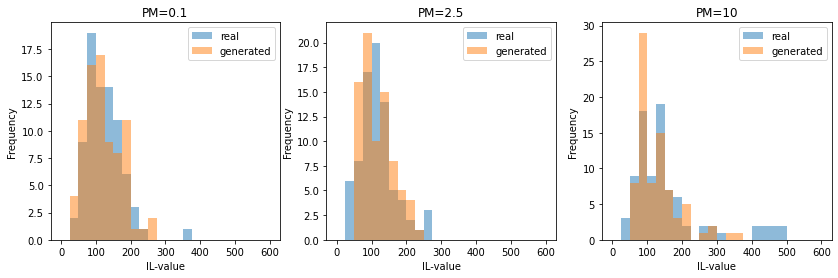

In [7]:
bins = [0,25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,500,600]
hist(real_data,data_df,bins)


VAE

In [4]:
cat_vars = ['Asthma','Apical','Season']
seed=42
epochs=6500
bs=16
vae,tf=train_vae(real_data,cat_vars,seed,epochs,bs)
data= vae.sample(len(real_data))

[Epoch:0/6500]	 Loss: 43.5969
[Epoch:100/6500]	 Loss: 15.1489
[Epoch:200/6500]	 Loss: 15.0631
[Epoch:300/6500]	 Loss: 14.7522
[Epoch:400/6500]	 Loss: 14.1738
[Epoch:500/6500]	 Loss: 13.0742
[Epoch:600/6500]	 Loss: 9.5260
[Epoch:700/6500]	 Loss: 10.6763
[Epoch:800/6500]	 Loss: 8.6569
[Epoch:900/6500]	 Loss: 8.8224
[Epoch:1000/6500]	 Loss: 9.9764
[Epoch:1100/6500]	 Loss: 7.6570
[Epoch:1200/6500]	 Loss: 6.6182
[Epoch:1300/6500]	 Loss: 4.9037
[Epoch:1400/6500]	 Loss: 5.5639
[Epoch:1500/6500]	 Loss: 4.7575
[Epoch:1600/6500]	 Loss: 6.6068
[Epoch:1700/6500]	 Loss: 5.0786
[Epoch:1800/6500]	 Loss: 3.5357
[Epoch:1900/6500]	 Loss: 4.5183
[Epoch:2000/6500]	 Loss: 2.3491
[Epoch:2100/6500]	 Loss: 3.0803
[Epoch:2200/6500]	 Loss: 3.4754
[Epoch:2300/6500]	 Loss: 2.2724
[Epoch:2400/6500]	 Loss: 3.4372
[Epoch:2500/6500]	 Loss: 2.1293
[Epoch:2600/6500]	 Loss: 2.3010
[Epoch:2700/6500]	 Loss: 3.0122
[Epoch:2800/6500]	 Loss: 1.4763
[Epoch:2900/6500]	 Loss: 0.0856
[Epoch:3000/6500]	 Loss: 1.8168
[Epoch:3100/6

In [5]:
data=tf.inverse_transform(data)
data_df = pd.DataFrame(data,columns=['PM=0.1','PM=2.5','PM=10','age','Asthma','Apical','Season'])


In [6]:
compare(real_data,data_df)

The Kolmogorov-Smirnov test :
- PM=0.1 | p-value: 0.9219575000121607
- PM=2.5 | p-value: 0.9219575000121607
- PM=10 | p-value: 0.9219575000121607


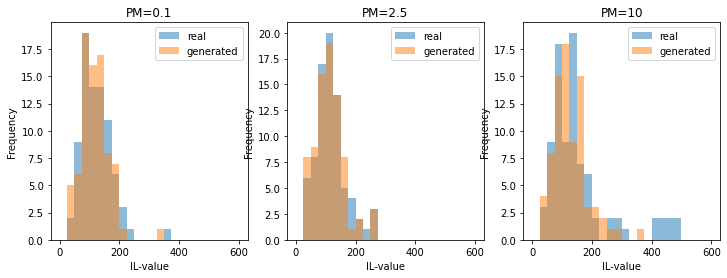

In [11]:
bins = [0,25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,500,600]
hist(real_data,data_df,bins)


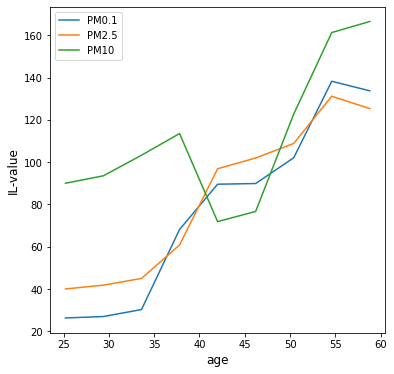

In [11]:
in2 = np.array([[0.02799917, 0.00626688, 0.07792524, 0.95238095 ,1,0,1,0,0,1]])
age_l = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
age(in2,age_l,tf,vae)

In [10]:

input = np.array([[0.02799917, 0.00626688, 0.07792524, 0.95238095 ,1,0,1,0,0,1]])
print("input data:",tf.inverse_transform(input))
output = vae.pred(tf,input,1000)
output[1][-1]

input data: [[35.061593297263414 36.941859340925156 78.85382310452198
  60.999999900000006 'Asthma' 'Apical' 'winter']]


2.2434220305953562e-06

HealthyApicalwinter


<Figure size 720x1440 with 0 Axes>

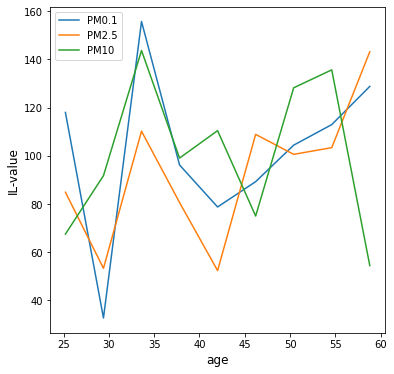

AsthmaApicalwinter


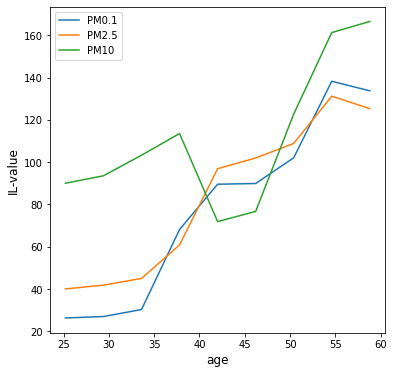

HealthyApicalsummer


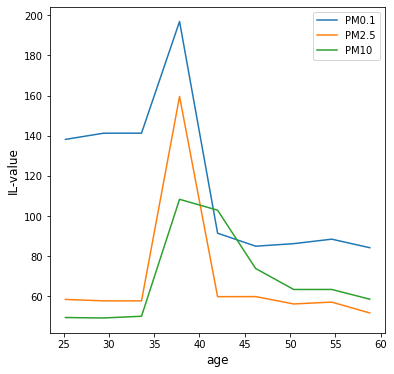

AsthmaApicalsummer


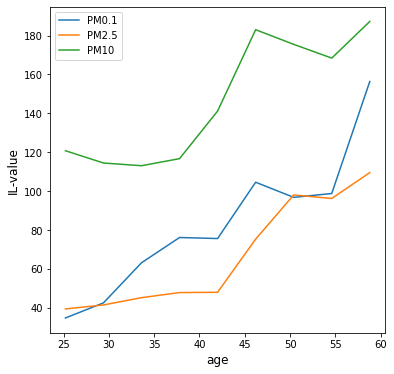

HealthyBasalwinter


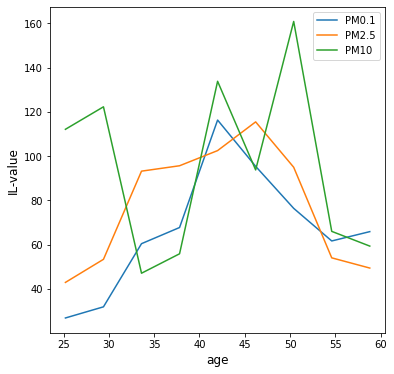

AsthmaBasalwinter


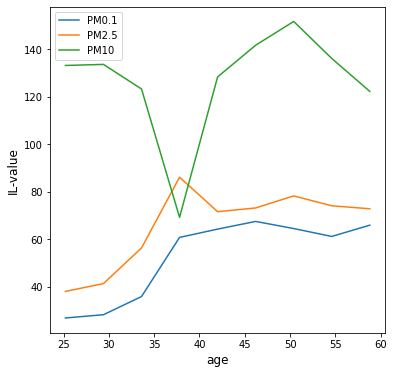

HealthyBasalsummer


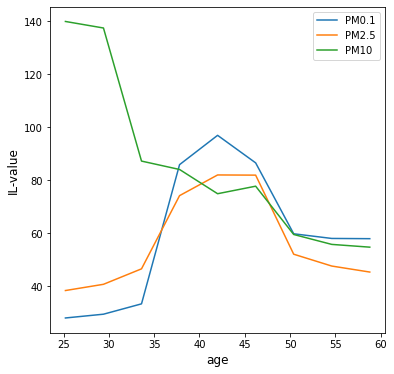

AsthmaBasalsummer


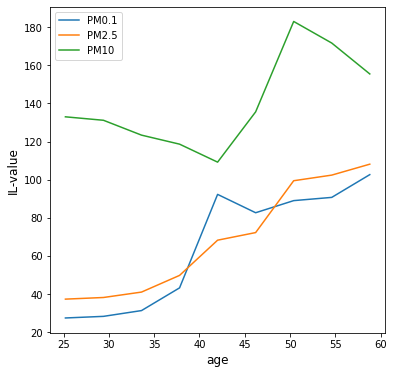

In [12]:
input =  np.array([[0.11173747, 0.05382368, 0.02989337, 0.76190476]])
all_age(input,age_l,tf,vae)

HealthyApicalwinter


<Figure size 720x1440 with 0 Axes>

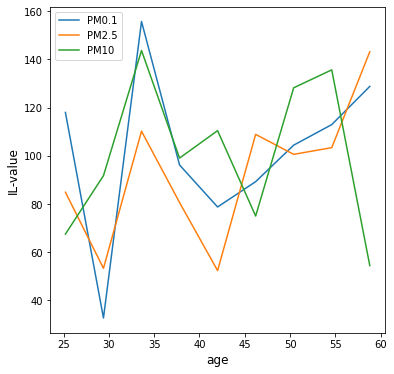

AsthmaApicalwinter


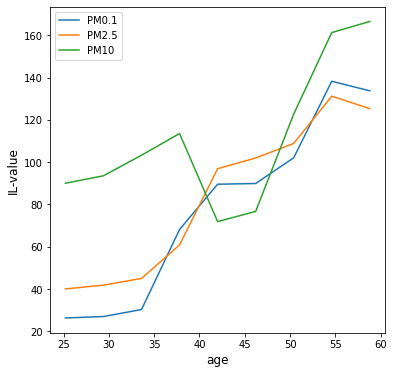

HealthyApicalsummer


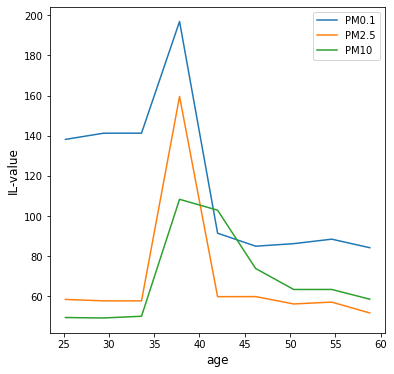

AsthmaApicalsummer


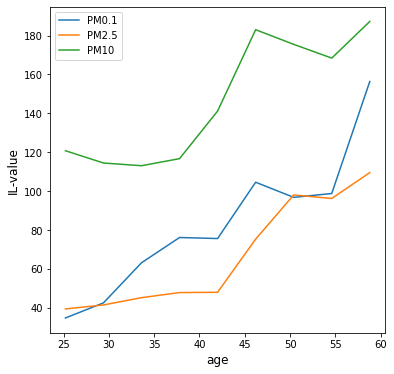

HealthyBasalwinter


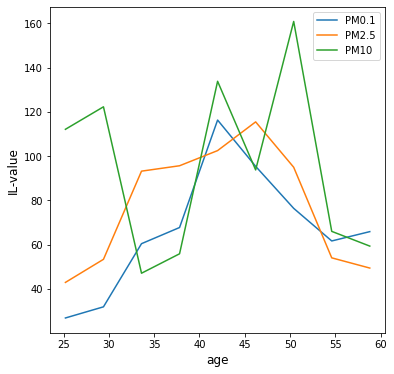

AsthmaBasalwinter


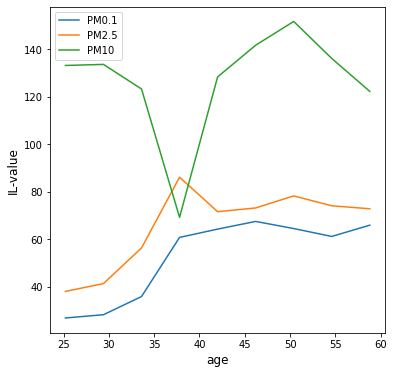

HealthyBasalsummer


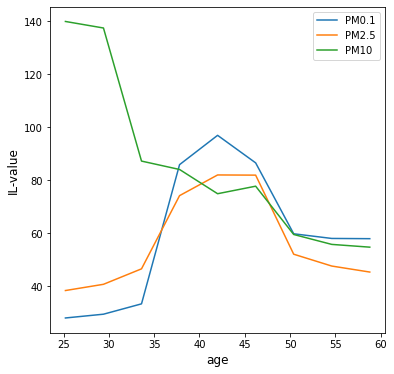

AsthmaBasalsummer


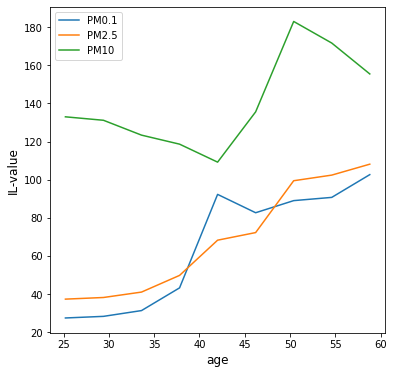

In [13]:
input =  np.array([[0.11173747, 0.05382368, 0.02989337, 0.76190476]])
all_age(input,age_l,tf,vae)

HealthyApicalwinter


<Figure size 720x1440 with 0 Axes>

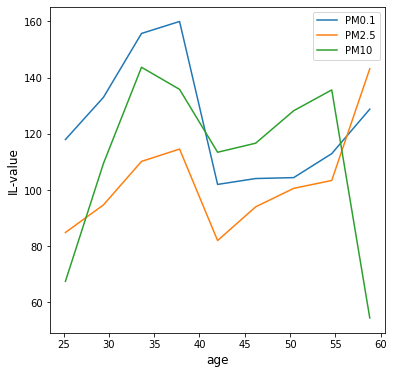

AsthmaApicalwinter


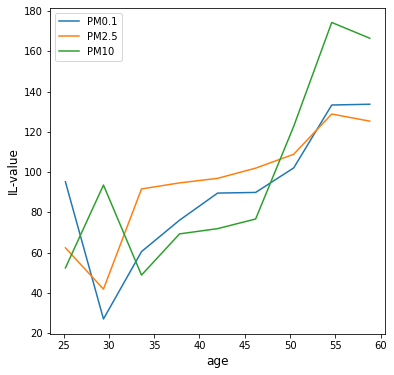

HealthyApicalsummer


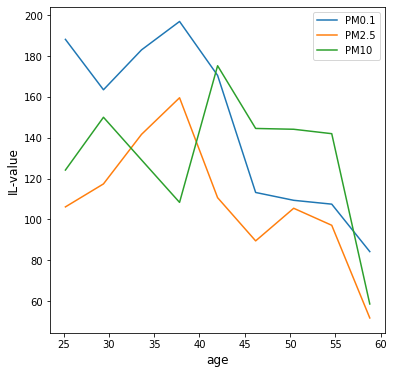

AsthmaApicalsummer


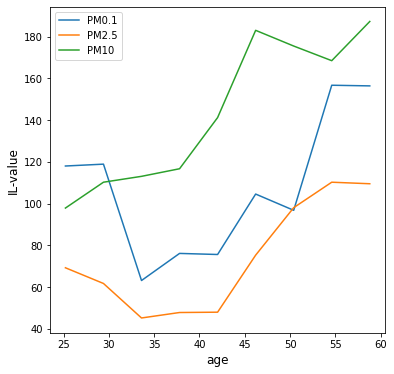

HealthyBasalwinter


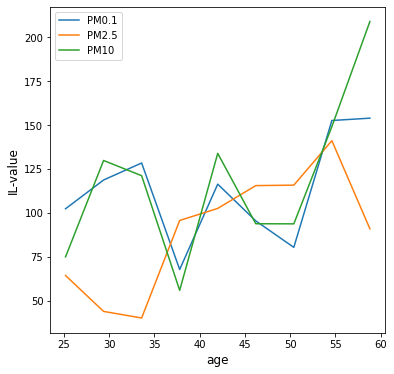

AsthmaBasalwinter


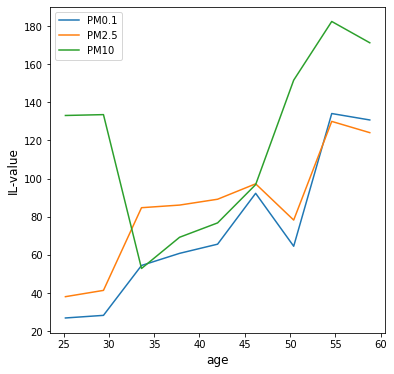

HealthyBasalsummer


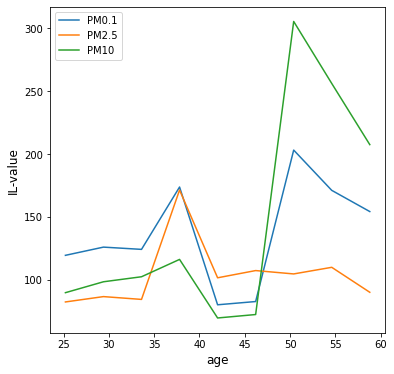

AsthmaBasalsummer


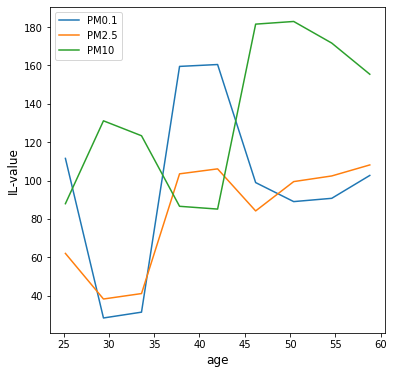

In [19]:
input =  np.array([[0.3, 0.3, 0.3, 0.3]])
age_l = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
all_age(input,age_l,tf,vae)

HealthyApicalwinter


<Figure size 720x1440 with 0 Axes>

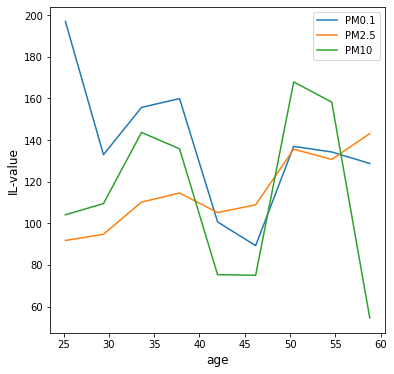

AsthmaApicalwinter


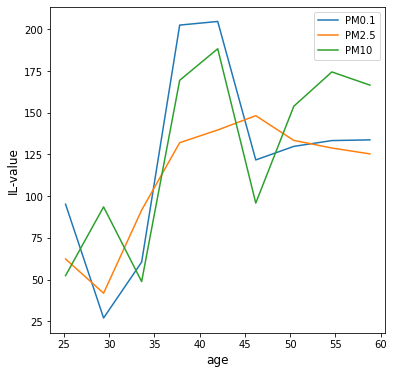

HealthyApicalsummer


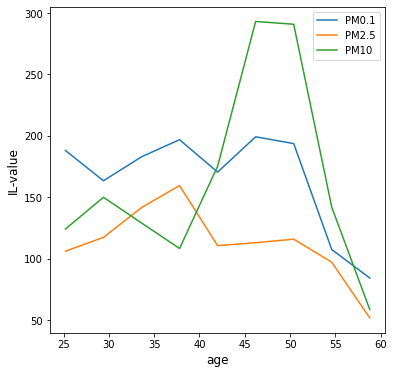

AsthmaApicalsummer


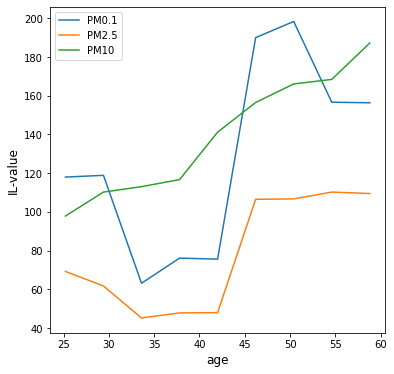

HealthyBasalwinter


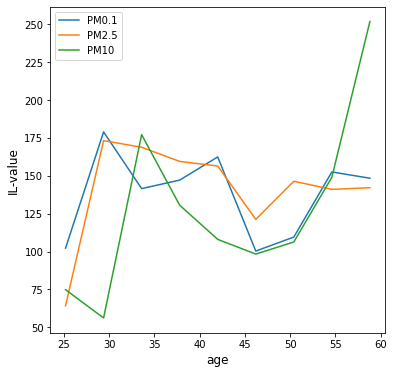

AsthmaBasalwinter


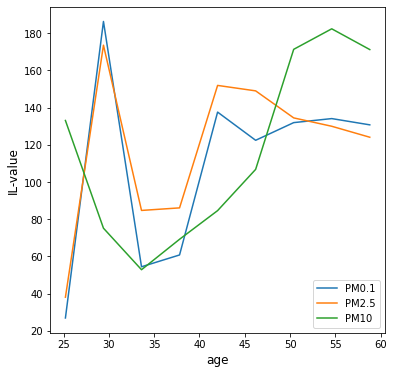

HealthyBasalsummer


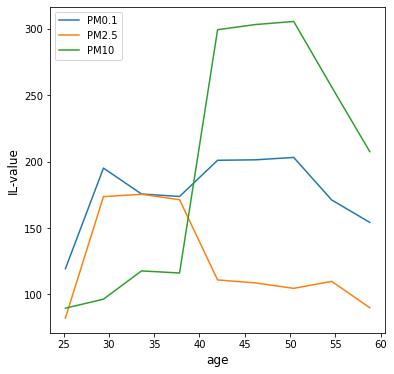

AsthmaBasalsummer


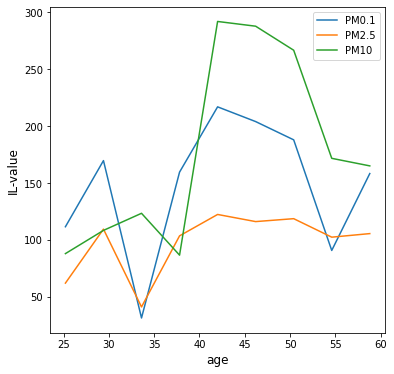

In [14]:
input =  np.array([[0.4, 0.4, 0.4, 0.4]])
age_l = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
all_age(input,age_l,tf,vae)

HealthyApicalwinter


<Figure size 720x1440 with 0 Axes>

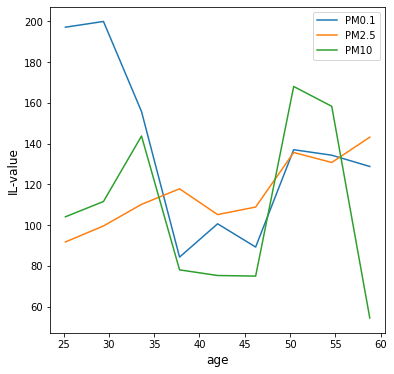

AsthmaApicalwinter


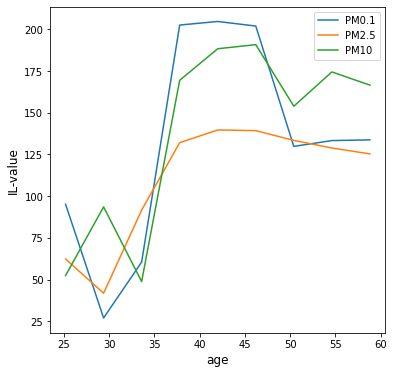

HealthyApicalsummer


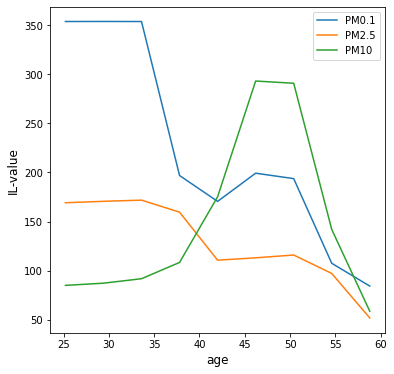

AsthmaApicalsummer


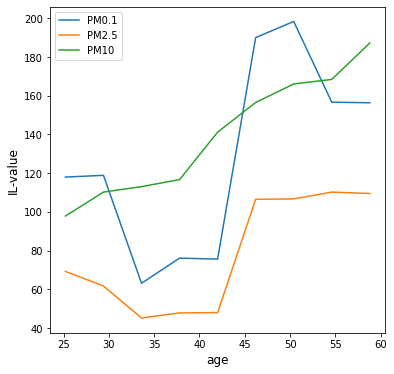

HealthyBasalwinter


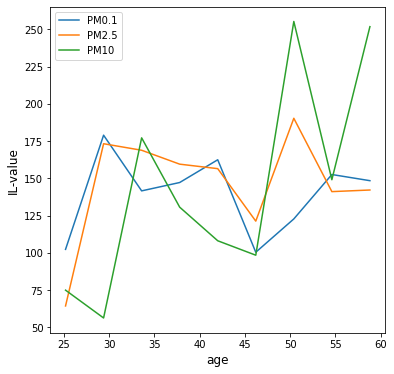

AsthmaBasalwinter


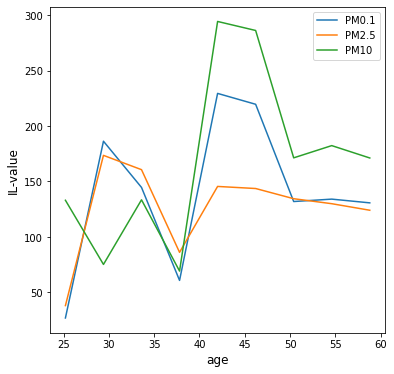

HealthyBasalsummer


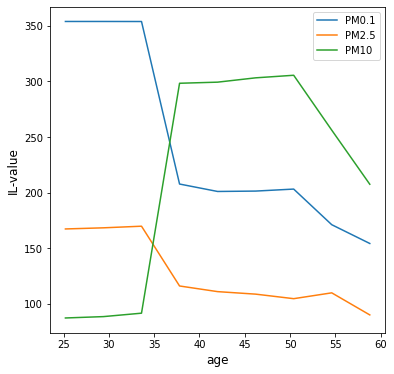

AsthmaBasalsummer


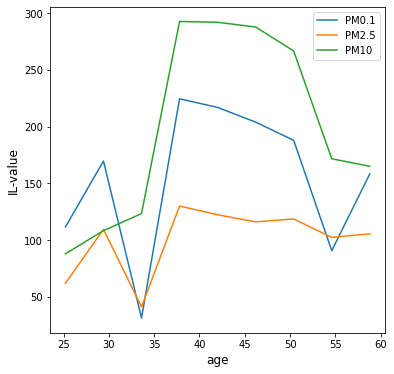

In [15]:
input =  np.array([[0.5, 0.5, 0.5, 0.5]])
age_l = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
all_age(input,age_l,tf,vae)

HealthyApicalwinter


<Figure size 720x1440 with 0 Axes>

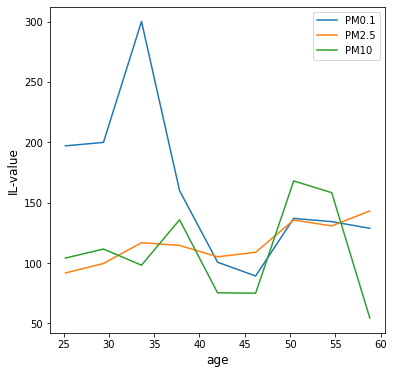

AsthmaApicalwinter


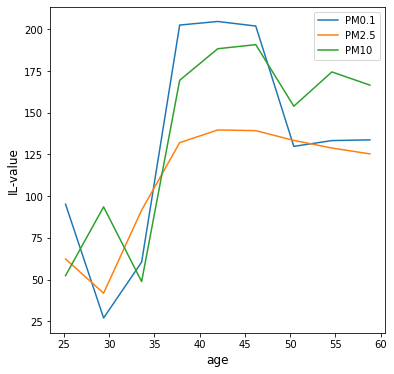

HealthyApicalsummer


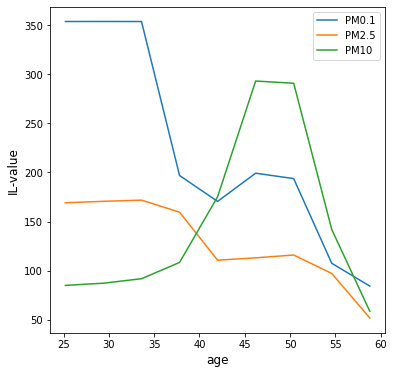

AsthmaApicalsummer


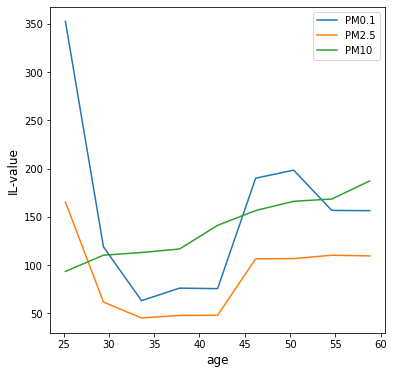

HealthyBasalwinter


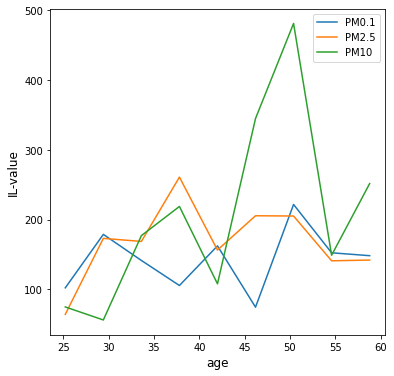

AsthmaBasalwinter


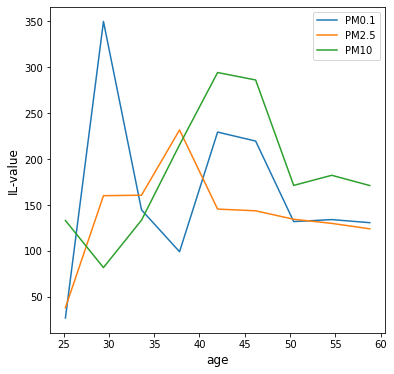

HealthyBasalsummer


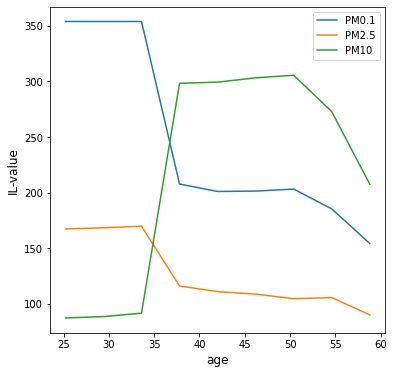

AsthmaBasalsummer


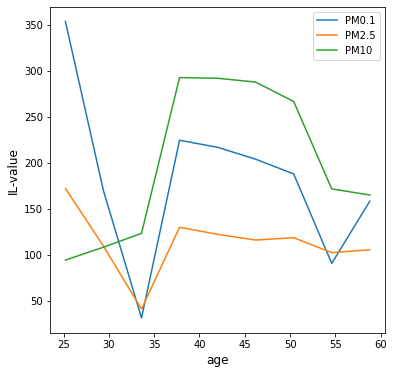

In [18]:
input =  np.array([[0.6, 0.6, 0.6, 0.6]])
age_l = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
all_age(input,age_l,tf,vae)

Original data by **VAE**

In [27]:
ori_data = pd.read_csv("il8_ori.csv", sep=',')
ori_data.head()

,UT,PM=0.1,PM=2.5,PM=10,Asthma,Apical,Season,age
0,7.532077,11.573792,8.255018,6.687240,Asthma,Basal,summer,42
1,9.321732,8.523270,13.539790,7.819806,Asthma,Basal,summer,42
2,21.488647,22.678291,23.234209,22.185420,Asthma,Basal,summer,61
3,13.995143,9.261756,13.896410,14.261659,Asthma,Basal,summer,61
4,2.247000,1.753813,2.840237,3.592046,Asthma,Basal,winter,48


In [28]:
dis_vars = ['Asthma','Apical','Season']
seed=42
epochs=6000
bs=16
vae,tf=train_vae(ori_data,dis_vars,seed,epochs,bs)
data= vae.sample(len(ori_data))

[Epoch:0/6000]	 Loss: 74.2890
[Epoch:100/6000]	 Loss: 5.3678
[Epoch:200/6000]	 Loss: 5.4743
[Epoch:300/6000]	 Loss: 2.5588
[Epoch:400/6000]	 Loss: 2.6594
[Epoch:500/6000]	 Loss: 3.7814
[Epoch:600/6000]	 Loss: 1.2812
[Epoch:700/6000]	 Loss: 0.2959
[Epoch:800/6000]	 Loss: -2.8095
[Epoch:900/6000]	 Loss: 0.4539
[Epoch:1000/6000]	 Loss: 0.9948
[Epoch:1100/6000]	 Loss: -3.8517
[Epoch:1200/6000]	 Loss: -4.7279
[Epoch:1300/6000]	 Loss: -5.7444
[Epoch:1400/6000]	 Loss: -1.6820
[Epoch:1500/6000]	 Loss: -5.7677
[Epoch:1600/6000]	 Loss: -6.6370
[Epoch:1700/6000]	 Loss: -4.3753
[Epoch:1800/6000]	 Loss: -8.1749
[Epoch:1900/6000]	 Loss: -8.3980
[Epoch:2000/6000]	 Loss: -7.0303
[Epoch:2100/6000]	 Loss: -7.0345
[Epoch:2200/6000]	 Loss: -5.0942
[Epoch:2300/6000]	 Loss: 1.4135
[Epoch:2400/6000]	 Loss: -0.3495
[Epoch:2500/6000]	 Loss: -8.4583
[Epoch:2600/6000]	 Loss: -6.9692
[Epoch:2700/6000]	 Loss: 9.5188
[Epoch:2800/6000]	 Loss: -8.1895
[Epoch:2900/6000]	 Loss: -7.0099
[Epoch:3000/6000]	 Loss: -8.0578


In [29]:
data=tf.inverse_transform(data)
data_df = pd.DataFrame(data,columns=['UT','PM=0.1','PM=2.5','PM=10','age','Asthma','Apical','Season'])
compare(ori_data,data_df)

The Kolmogorov-Smirnov test :
- PM=0.1 | p-value: 0.7371585650178047
- PM=2.5 | p-value: 0.6090575232715011
- PM=10 | p-value: 0.9403434525017745


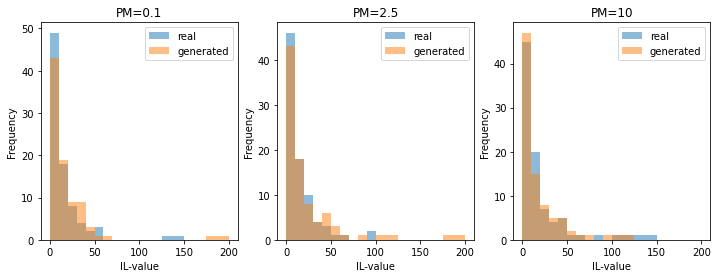

In [30]:
bins = [0,10,20,30,40,50,60,70,80,90,100,125,150,175,200]
hist(ori_data,data_df,bins)
